In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# get in quads folder

In [3]:
BeamMomentum =  "3.574" #"2.0001" # 3.574

In [4]:
quads_directory_path = "/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/"

quads_families = os.listdir(quads_directory_path)

temp = os.listdir(quads_directory_path)
FilesForChosenMomentum = []
for file in temp:
    if "%s"%BeamMomentum in file:
        FilesForChosenMomentum.append(file)
        
FitFiles, StrenghtFiles, quads_families = [], [], []
for file in FilesForChosenMomentum:
    if "FIT" in file:
        FitFiles.append(file)
    elif "NormStrenght" in file:
        StrenghtFiles.append(file)
    elif "StrenghtsQuadrupoles" in file:
        pass
    else:
        quads_families.append(file)

In [5]:
quads_families = ["QDC", "QDN", "QDS", "QDW7", "QDW9", "QFC", "QFNS", "QFN", "QFW6", "QFW8"]
print(quads_families)

['QDC', 'QDN', 'QDS', 'QDW7', 'QDW9', 'QFC', 'QFNS', 'QFN', 'QFW6', 'QFW8']


# compare measures with fit

In [6]:
def LinearLaw (x, a, b):
    y = a*x + b
    return y

Text(0, 0.5, '$K_1$ [$1/m^2$]')

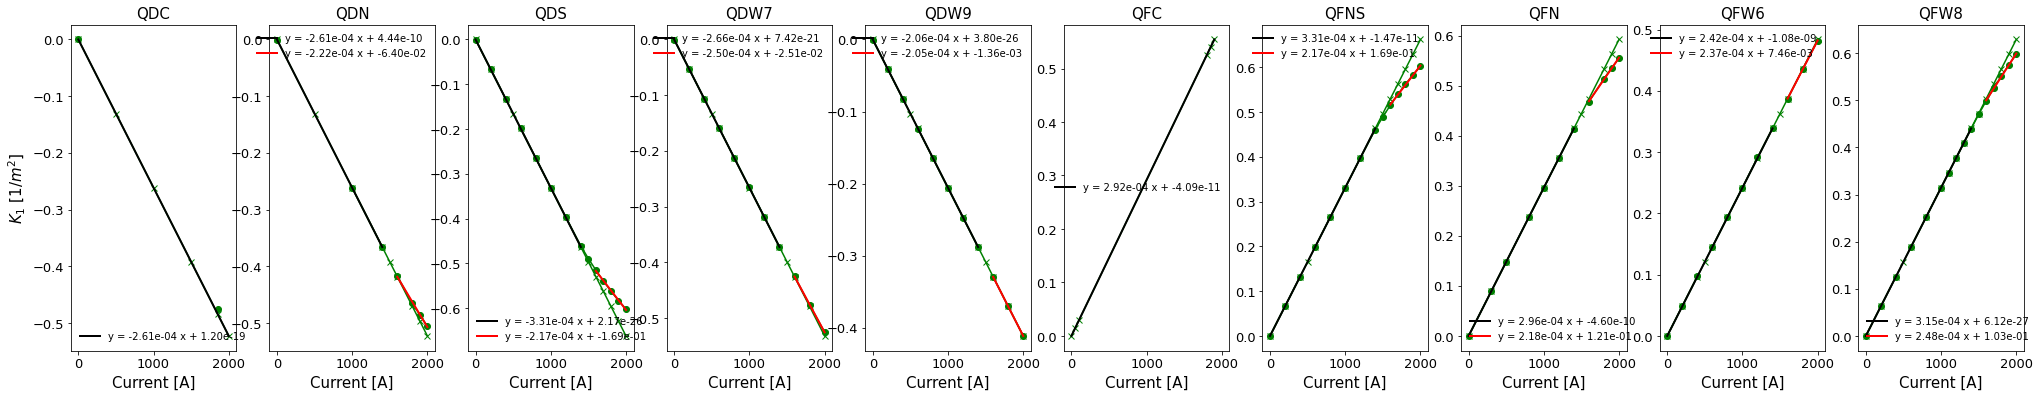

In [7]:
os.chdir(quads_directory_path)
SaturationCurrent = 1500

f, ax_q = plt.subplots(1, len(quads_families), figsize = (35,6), sharex = True, sharey = False)

for i_quad, quad in enumerate(quads_families):
    
    df_strenght = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/Quads_%s_NormStrenght_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    df_fit = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/FIT_Quads_%s_StrenghtCurrent_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Calculated, "x-g")
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Measured, "o-g")
    
    if df_fit["saturation_1250A"].values[0] == 0:
        ax_q[i_quad].plot(df_strenght.Current, LinearLaw(df_strenght.Current, *df_fit["linear"].values), "-k", lw = 2,
                          label = "y = %1.2e x + %1.2e"%(df_fit["linear"].values[0], df_fit["linear"].values[1]))
        ax_q[i_quad].legend(frameon = False)
    else:
        ax_q[i_quad].plot(df_strenght[df_strenght.Current < SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current < SaturationCurrent].Current, 
                                                                                                  *df_fit["linear"].values), "-k", lw = 2, label = "y = %1.2e x + %1.2e"%(df_fit["linear"].values[0], df_fit["linear"].values[1]))
        ax_q[i_quad].plot(df_strenght[df_strenght.Current > SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current > SaturationCurrent].Current, 
                                                                                                  *df_fit["saturation_1250A"].values), "-r", lw = 2, label = "y = %1.2e x + %1.2e"%(df_fit["saturation_1250A"].values[0], df_fit["saturation_1250A"].values[1]))
        ax_q[i_quad].legend(frameon = False)
    ax_q[i_quad].set_xlabel ("Current [A]", size = 15)
    ax_q[i_quad].tick_params (axis = "both", which = "major", labelsize = 13)
    ax_q[i_quad].set_title("%s"%quad, size = 15)
ax_q[0].set_ylabel ("$K_1$ [$1/m^2$]", size = 15)

# write block to get the desired strenght from current value

In [8]:
df = pd.DataFrame()
df["NameCircuit"] = []
df["CurrentValue_inA"] = []
for quad in quads_families:
    df["%s"%quad] = []

In [9]:
df

,NameCircuit,CurrentValue_inA,QDC,QDN,QDS,QDW7,QDW9,QFC,QFNS,QFN,QFW6,QFW8


In [10]:
##############               Q-main1    Qmain2   Qtrim1  Qtrim2   Qtrim3   Qtrim4  Qtrim5
if BeamMomentum == "3.574":
    ## These values refer to the 3.57GeV/c plateau
    AllInputValueCurrent = [1812.881, 1127.270, 35.392, 221.905, 49.300, 195.740, 52.211]
elif BeamMomentum == "2.0001":
    ## These values refer to the 2GeV/c plateau
    AllInputValueCurrent = [ 968.72,   618.915, 40.944, 140.645, 23.893,  41.786, 85.006]
elif BeamMomentum == "0.3":
    ## These values refer to the 300 MeV/c plateau
    AllInputValueCurrent = [ 144.126,   90.715,  8.719,  24.534,  3.937,  12.519, 11.065]
elif BeamMomentum == "0.1":
    ## These values refer to the 300 MeV/c plateau
    AllInputValueCurrent = [  46.656,   30.219,  3.806,   7.808,  1.880,   2.405,  5.844]

For the input value of 1812.881000 (circuit Qmain1) the strenght for each quad family is:

QDC --> -0.4737907
QDN --> -0.4655979
QDS --> -0.5631905
QDW7 --> -0.4789647
QDW9 --> -0.3729886
QFC --> 0.5288701
QFNS --> 0.5631905
QFN --> 0.5154037
QFW6 --> 0.4379629
QFW8 --> 0.5529270
For the input value of 1127.270000 (circuit Qmain2) the strenght for each quad family is:

QDC --> -0.2946084
QDN --> -0.2946084
QDS --> -0.3731707
QDW7 --> -0.3000642
QDW9 --> -0.2318678
QFC --> 0.3288574
QFNS --> 0.3731707
QFN --> 0.3338896
QFW6 --> 0.2727856
QFW8 --> 0.3546213
For the input value of 35.392000 (circuit Qtrim1) the strenght for each quad family is:

QDC --> -0.0092496
QDN --> -0.0092496
QDS --> -0.0117161
QDW7 --> -0.0094209
QDW9 --> -0.0072798
QFC --> 0.0103249
QFNS --> 0.0117161
QFN --> 0.0104829
QFW6 --> 0.0085644
QFW8 --> 0.0111338
For the input value of 221.905000 (circuit Qtrim2) the strenght for each quad family is:

QDC --> -0.0579942
QDN --> -0.0579942
QDS --> -0.0734593
QDW7 --> -0.

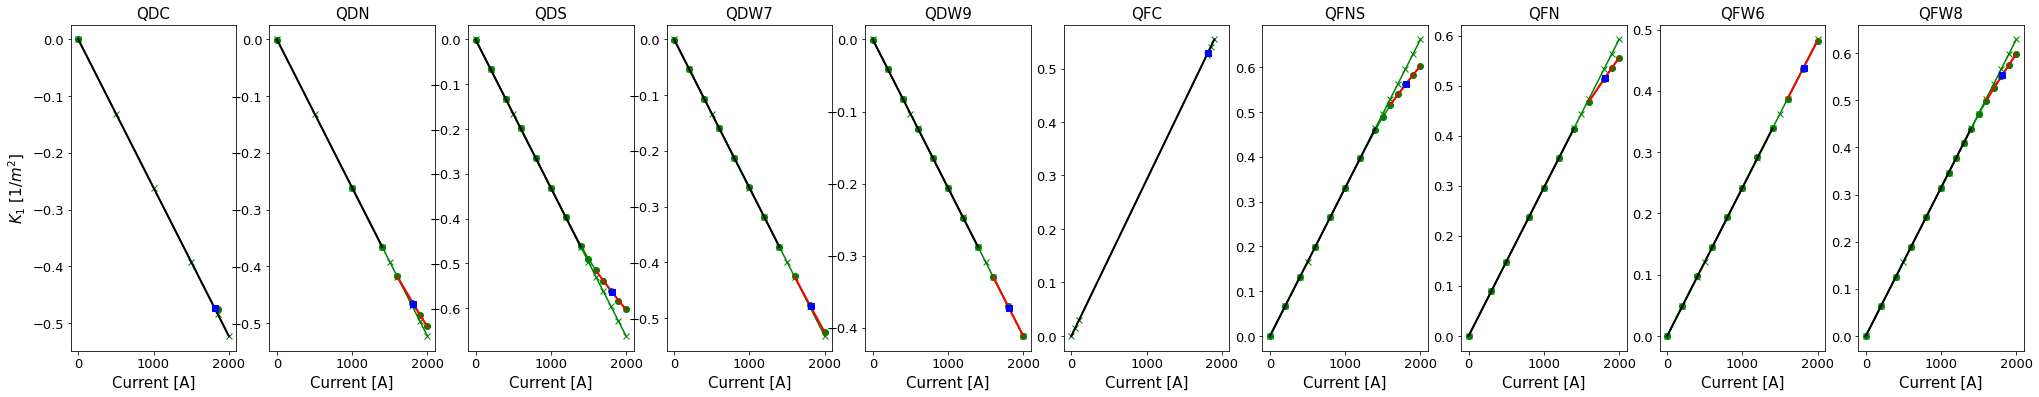

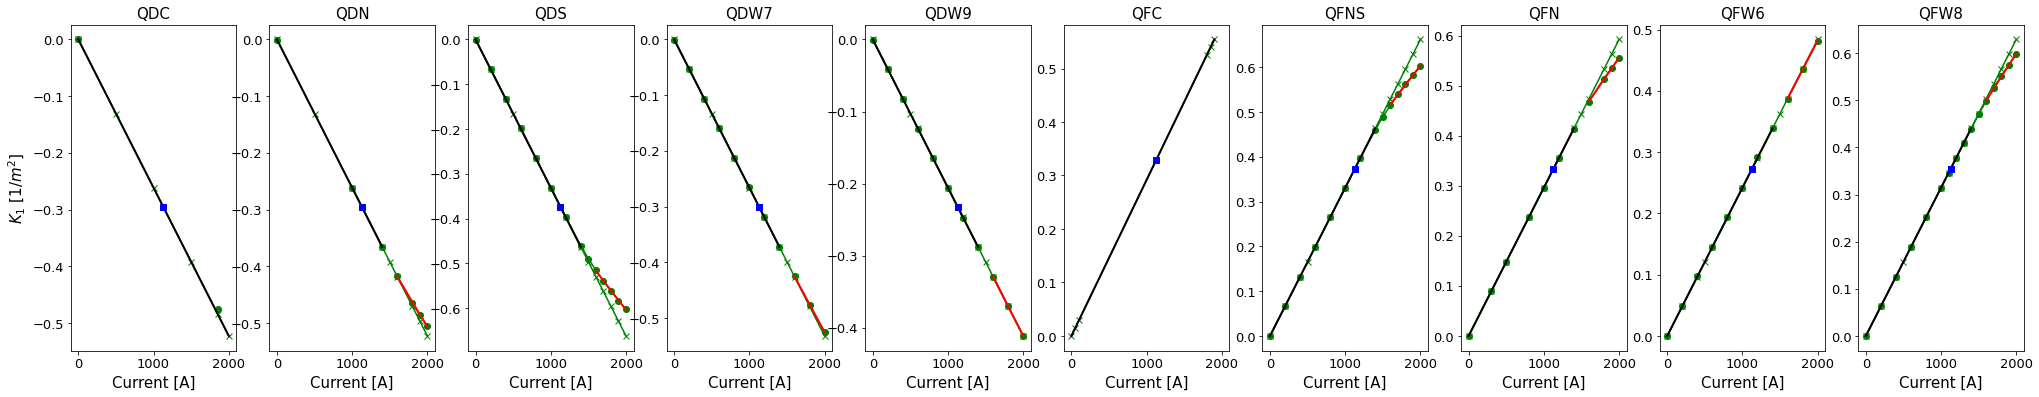

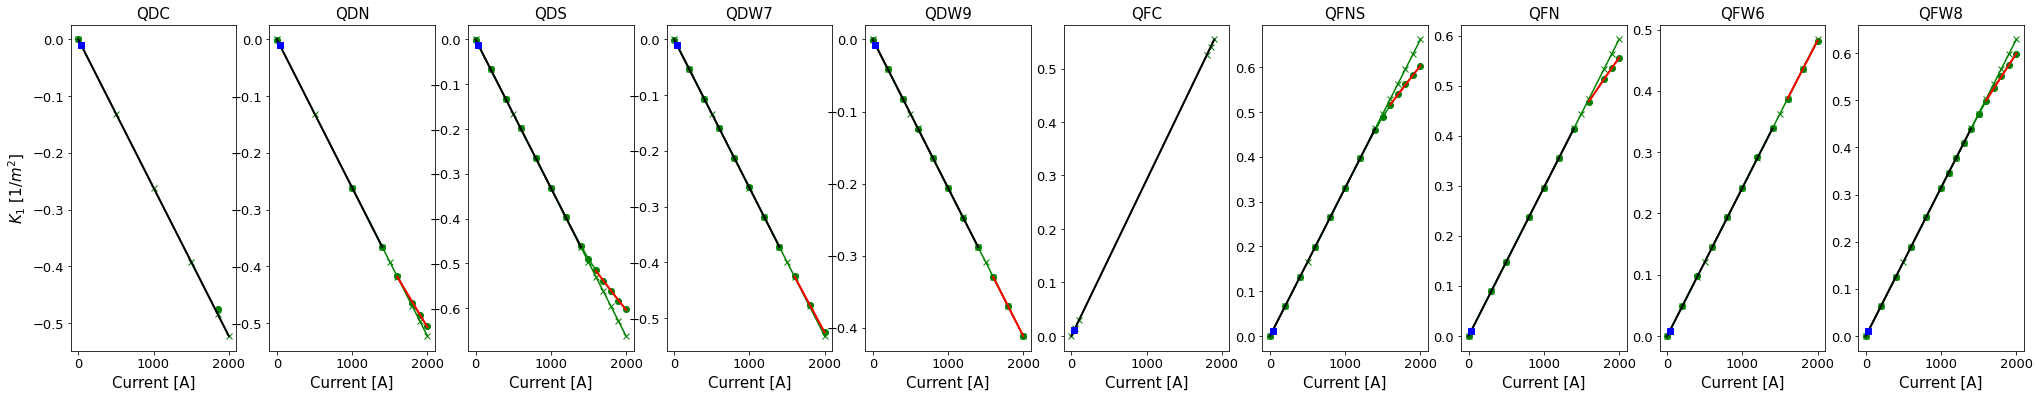

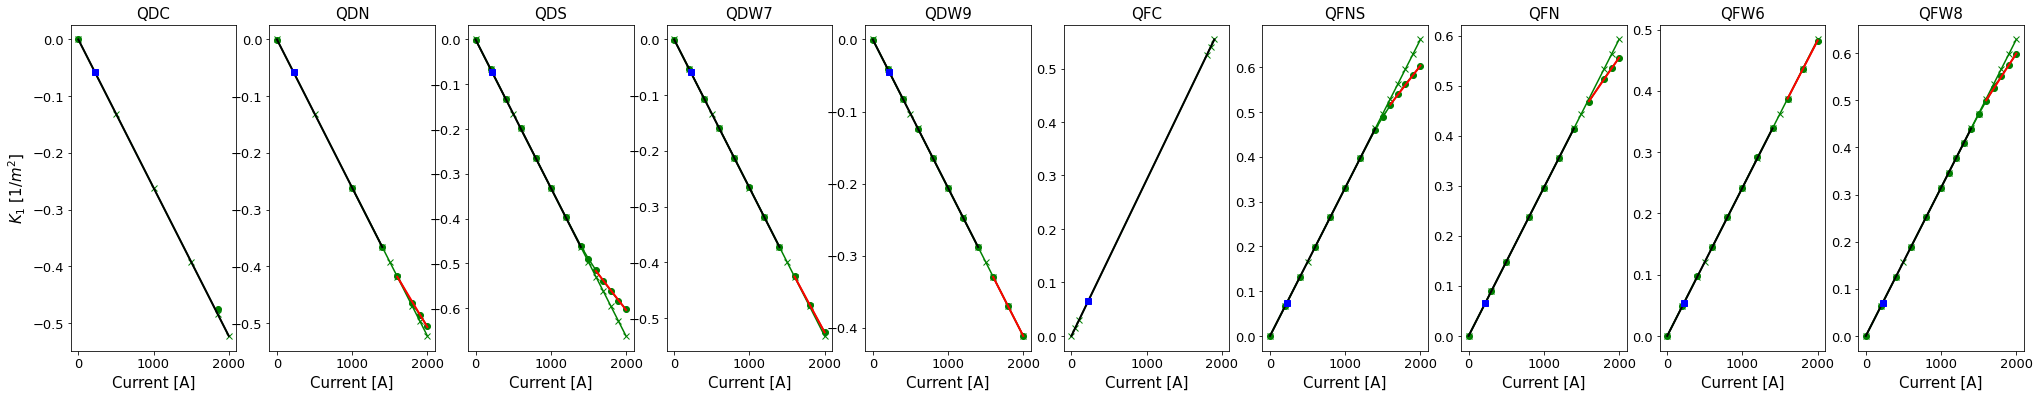

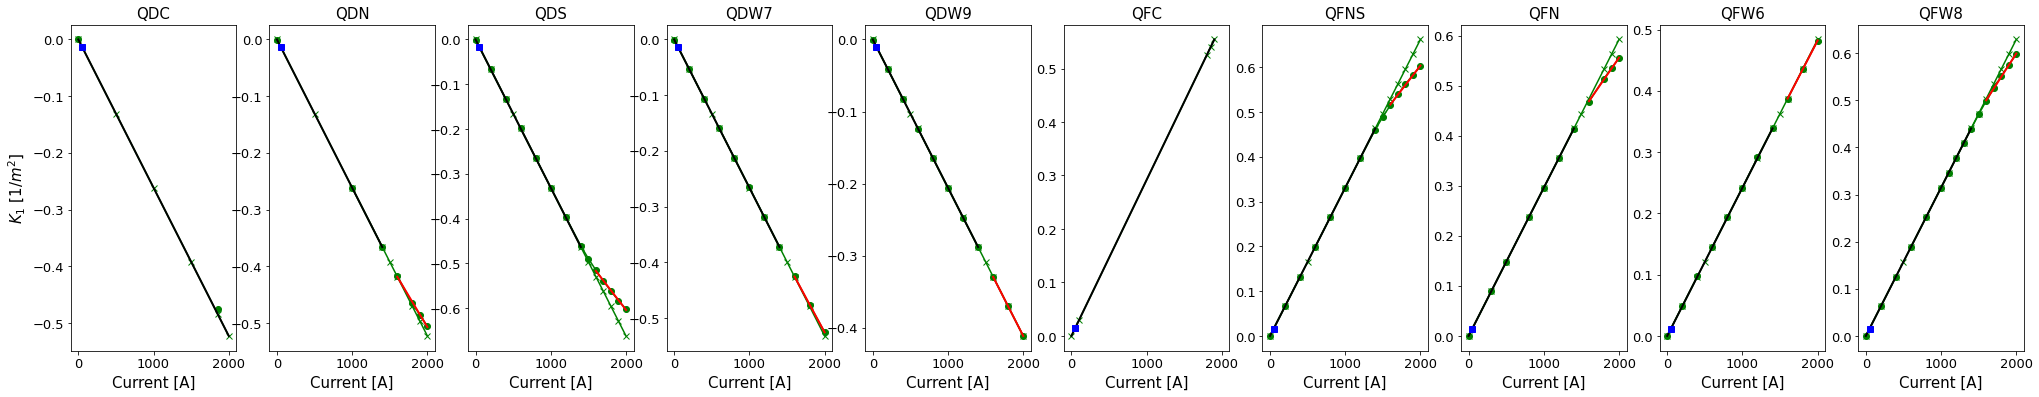

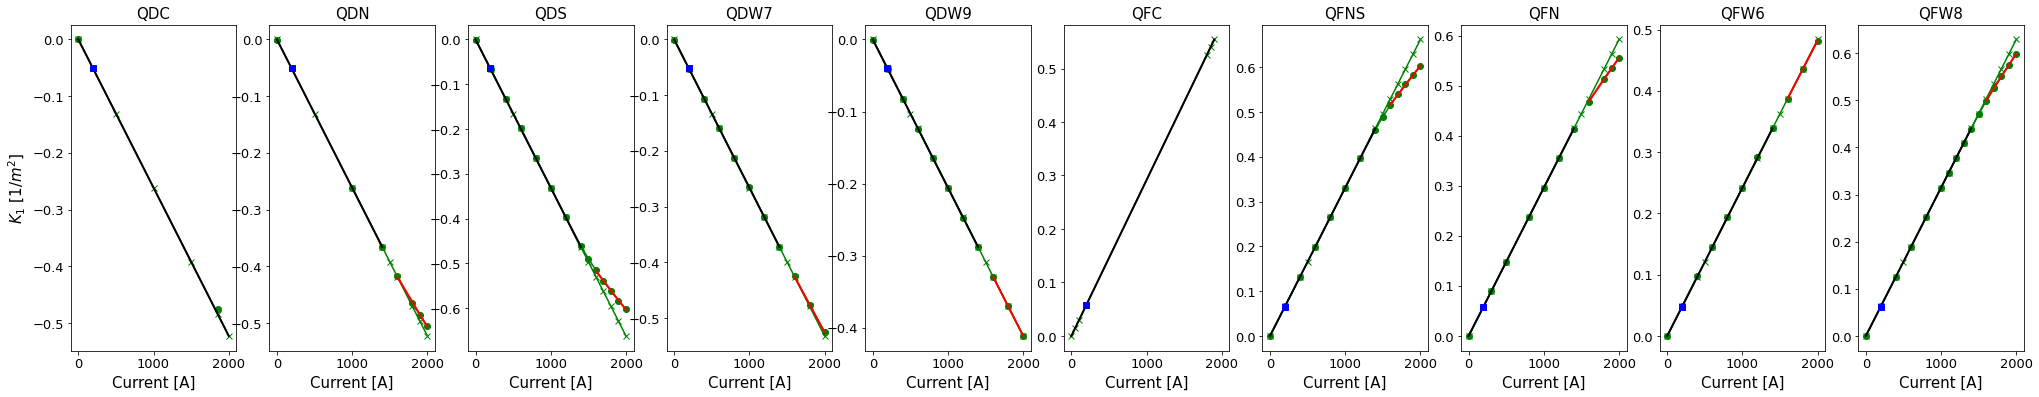

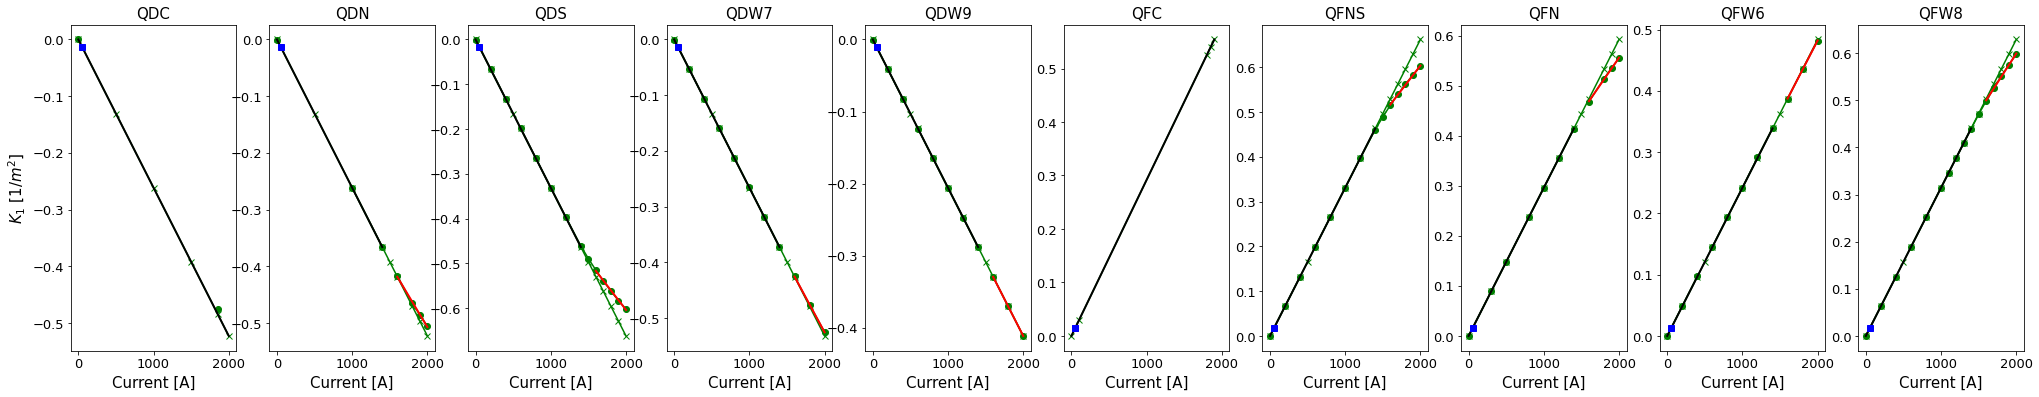

In [12]:
df["NameCircuit"] = ["Qmain1", "Qmain2", "Qtrim1", "Qtrim2", "Qtrim3", "Qtrim4", "Qtrim5"]
df["CurrentValue_inA"] = AllInputValueCurrent

for h, InputValueCurrent in enumerate(AllInputValueCurrent):
    f, ax_q = plt.subplots(1, len(quads_families), figsize = (35,6), sharex = True, sharey = False)
    print("For the input value of %f"%InputValueCurrent, "(circuit %s)"%df["NameCircuit"].values[h], "the strenght for each quad family is:\n")

    AllStrenght_AtInputCurrent = []
    
    for i_quad, quad in enumerate(quads_families):
        Strenght_AtInputCurrent = 0.
        
        df_strenght = pd.read_csv("%s"%StrenghtFiles[i_quad])
        df_fit = pd.read_csv("%s"%FitFiles[i_quad])
    
        ax_q[i_quad].plot(df_strenght.Current, df_strenght.Calculated, "x-g")
        ax_q[i_quad].plot(df_strenght.Current, df_strenght.Measured, "o-g")

        if df_fit["saturation_1250A"].values[0] == 0:
            ax_q[i_quad].plot(df_strenght.Current, LinearLaw(df_strenght.Current, *df_fit["linear"].values), "-k", lw = 2)
            saturation = False
        else:
            saturation = True
            ax_q[i_quad].plot(df_strenght[df_strenght.Current < SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current < SaturationCurrent].Current, 
                                                                                                      *df_fit["linear"].values), "-k", lw = 2)
            ax_q[i_quad].plot(df_strenght[df_strenght.Current > SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current > SaturationCurrent].Current, 
                                                                                                      *df_fit["saturation_1250A"].values), "-r", lw = 2)

        if (InputValueCurrent < SaturationCurrent) or ( (InputValueCurrent > SaturationCurrent) and saturation == False ):
            Strenght_AtInputCurrent = LinearLaw(InputValueCurrent, *df_fit["linear"].values)
            ax_q[i_quad].plot(InputValueCurrent, Strenght_AtInputCurrent,  "sb")
            print(quad, "--> %1.7f"%Strenght_AtInputCurrent)
        else:
            if h >0:
                Strenght_AtInputCurrent = LinearLaw(InputValueCurrent + AllInputValueCurrent[0], *df_fit["saturation_1250A"].values) - LinearLaw(AllInputValueCurrent[0], *df_fit["saturation_1250A"].values)
            else:
                Strenght_AtInputCurrent = LinearLaw(InputValueCurrent, *df_fit["saturation_1250A"].values)
            ax_q[i_quad].plot(InputValueCurrent, Strenght_AtInputCurrent,  "sb")
            print(quad, "--> %1.7f"%Strenght_AtInputCurrent)
        
        AllStrenght_AtInputCurrent = np.append(AllStrenght_AtInputCurrent, Strenght_AtInputCurrent)
        
        ax_q[i_quad].set_xlabel ("Current [A]", size = 15)
        ax_q[i_quad].tick_params (axis = "both", which = "major", labelsize = 13)
        ax_q[i_quad].set_title("%s"%quad, size = 15)
        
#         np.array(df.iloc[h].values[2+i_quad], dtype=float)
#         df.iloc[h].values[2+i_quad] = 10
        df.loc[h, "%s"%quad] = Strenght_AtInputCurrent
        
    ax_q[0].set_ylabel ("$K_1$ [$1/m^2$]", size = 15)

In [13]:
df

,NameCircuit,CurrentValue_inA,QDC,QDN,QDS,QDW7,QDW9,QFC,QFNS,QFN,QFW6,QFW8
0,Qmain1,1812.881,-0.473791,-0.465598,-0.563190,-0.478965,-0.372989,0.528870,0.563190,0.515404,0.437963,0.552927
1,Qmain2,1127.270,-0.294608,-0.294608,-0.373171,-0.300064,-0.231868,0.328857,0.373171,0.333890,0.272786,0.354621
2,Qtrim1,35.392,-0.009250,-0.009250,-0.011716,-0.009421,-0.007280,0.010325,0.011716,0.010483,0.008564,0.011134
3,Qtrim2,221.905,-0.057994,-0.057994,-0.073459,-0.059068,-0.045644,0.064736,0.073459,0.065727,0.053698,0.069808
4,Qtrim3,49.300,-0.012884,-0.012884,-0.016320,-0.013123,-0.010140,0.014382,0.016320,0.014602,0.011930,0.015509
5,Qtrim4,195.740,-0.051156,-0.051156,-0.064798,-0.052103,-0.040262,0.057103,0.064798,0.057977,0.047367,0.061577
6,Qtrim5,52.211,-0.013645,-0.013645,-0.017284,-0.013898,-0.010739,0.015231,0.017284,0.015465,0.012634,0.016425


In [14]:
df["QDC"].iloc[[1,2,3,4,5,6]] = np.nan
df["QDN"].iloc[[1,2,3,4,5,6]] = np.nan
df["QDS"].iloc[[1,2,3,4,5,6]] = np.nan
df["QDW7"].iloc[[1,2,4,5,6]] = np.nan
df["QDW9"].iloc[[1,2,4,5,6]] = np.nan
df["QFC"].iloc[[1,2,3,4,5]] = np.nan
df["QFN"].iloc[[1,2,3,4,5,6]] = np.nan
df["QFNS"].iloc[[2,3,4,6]] = np.nan
df["QFW6"].iloc[[1,3,4,5,6]] = np.nan
df["QFW8"].iloc[[1,2,3,5,6]] = np.nan

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df

,NameCircuit,CurrentValue_inA,QDC,QDN,QDS,QDW7,QDW9,QFC,QFNS,QFN,QFW6,QFW8
0,Qmain1,1812.881,-0.473791,-0.465598,-0.56319,-0.478965,-0.372989,0.528870,0.563190,0.515404,0.437963,0.552927
1,Qmain2,1127.270,NaN,NaN,NaN,NaN,NaN,NaN,0.373171,NaN,NaN,NaN
2,Qtrim1,35.392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008564,NaN
3,Qtrim2,221.905,NaN,NaN,NaN,-0.059068,-0.045644,NaN,NaN,NaN,NaN,NaN
4,Qtrim3,49.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015509
5,Qtrim4,195.740,NaN,NaN,NaN,NaN,NaN,NaN,0.064798,NaN,NaN,NaN
6,Qtrim5,52.211,NaN,NaN,NaN,NaN,NaN,0.015231,NaN,NaN,NaN,NaN


In [16]:
LinearLaw(11., 3.31e-4, 1.47e-11)

0.0036410000147

In [17]:
df.to_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/AD_StrenghtsQuadrupolesFor%sGeV.csv"%str(BeamMomentum), index = False)

# write block to get the current from strenght value:

In [ ]:
AllInputValueStrenght = [ 0.5188233 , -0.54735788,  0.57680013, -0.36727852,  0.54735788,
                         -0.4665887 , -0.46099835,  0.52982209,  0.43541476,  0.55305042,
                         -0.40846634, -0.52860349]

In [92]:
InputValueStrenght = np.abs(-0.55815376)

For the input value of 0.558154 the current for each quad family is:

QDC --> 2135.682
QDN --> 2230.690
QDS --> 1789.709
QDW7 --> 2129.171
QDW9 --> 2716.151
QFC --> 1913.261
QFNS --> 1789.709
QFN --> 2009.431
QFW6 --> 2319.018
QFW8 --> 1833.957


Text(0, 0.5, '$K_1$ [$1/m^2$]')

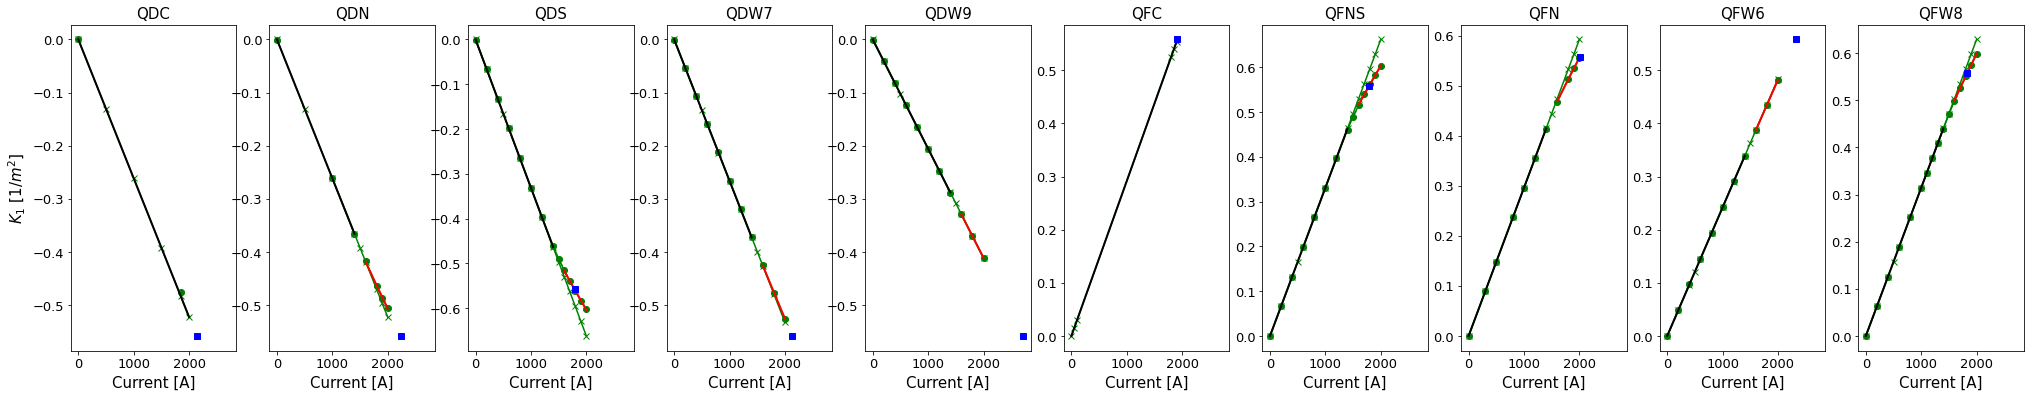

In [93]:
f, ax_q = plt.subplots(1, len(quads_families), figsize = (35,6), sharex = True, sharey = False)
print("For the input value of %f"%np.abs(InputValueStrenght), "the current for each quad family is:\n")

for i_quad, quad in enumerate(quads_families):
    
    if "D" in quad:
        sign_strenght = -1
    else:
        sign_strenght = 1
    
    df_strenght = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/Quads_%s_NormStrenght_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    df_fit = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/FIT_Quads_%s_StrenghtCurrent_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)   
    
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Calculated, "x-g")
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Measured, "o-g")
    
    if df_fit["saturation_1250A"].values[0] == 0:
        ax_q[i_quad].plot(df_strenght.Current, LinearLaw(df_strenght.Current, *df_fit["linear"].values), "-k", lw = 2)
        saturation = False
    else:
        saturation = True
        ax_q[i_quad].plot(df_strenght[df_strenght.Current < SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current < SaturationCurrent].Current, 
                                                                                                  *df_fit["linear"].values), "-k", lw = 2)
        ax_q[i_quad].plot(df_strenght[df_strenght.Current > SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current > SaturationCurrent].Current, 
                                                                                                  *df_fit["saturation_1250A"].values), "-r", lw = 2, label = "y = %1.2e x + %1.2e"%(df_fit["saturation_1250A"].values[0], df_fit["saturation_1250A"].values[1]))
    
    if saturation == False:
        Current_AtInputStrenght = ((InputValueStrenght*sign_strenght - df_fit["linear"].values[-1])
                                   /(df_fit["linear"].values[0]))
    else:
        SaturationStrenght = np.abs(LinearLaw(1250, *df_fit["saturation_1250A"].values))
        if InputValueStrenght >= SaturationStrenght:
            Current_AtInputStrenght = ((InputValueStrenght*sign_strenght - df_fit["saturation_1250A"].values[-1])
                                   /(df_fit["saturation_1250A"].values[0]))
        else:
            Current_AtInputStrenght = ((InputValueStrenght*sign_strenght - df_fit["linear"].values[-1])
                                   /(df_fit["linear"].values[0]))
    ax_q[i_quad].plot(Current_AtInputStrenght, InputValueStrenght*sign_strenght,  "sb")
    print(quad, "--> %1.3f"%Current_AtInputStrenght)
    
#     if (InputValueStrenght*sign_strenght < SaturationStrenght) or ( (InputValueStrenght*sign_strenght > SaturationStrenght) and saturation == False ):
        
#     else:
#         Current_AtInputStrenght = (InputValueStrenght*sign_strenght- df_fit["linear"].values[-1])/(df_fit["linear"].values[0])
#         ax_q[i_quad].plot(Current_AtInputStrenght, InputValueStrenght*sign_strenght,  "sb")
#         print(quad, "--> %1.3f"%Current_AtInputStrenght)
        
    ax_q[i_quad].set_xlabel ("Current [A]", size = 15)
    ax_q[i_quad].tick_params (axis = "both", which = "major", labelsize = 13)
    ax_q[i_quad].set_title("%s"%quad, size = 15)
ax_q[0].set_ylabel ("$K_1$ [$1/m^2$]", size = 15)